## Clasificacion

Problemas de aprendizaje automatica supervizado - Variable objetivo (respuesta) es categorica

Datos de entrenamiento -> el clasificador aproxima a una funcion de mapeo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
data = sns.load_dataset('iris')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Distribucion de cada calse
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Formacion de grupos de entranamiento y pruebas

In [5]:
#Separacion de datos
data.groupby('species').size()


species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
train , test = train_test_split(data,test_size=0.4,stratify=data['species'],random_state=42)
train.head(5)



,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
6,4.6,3.4,1.4,0.3,setosa
94,5.6,2.7,4.2,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
26,5.0,3.4,1.6,0.4,setosa


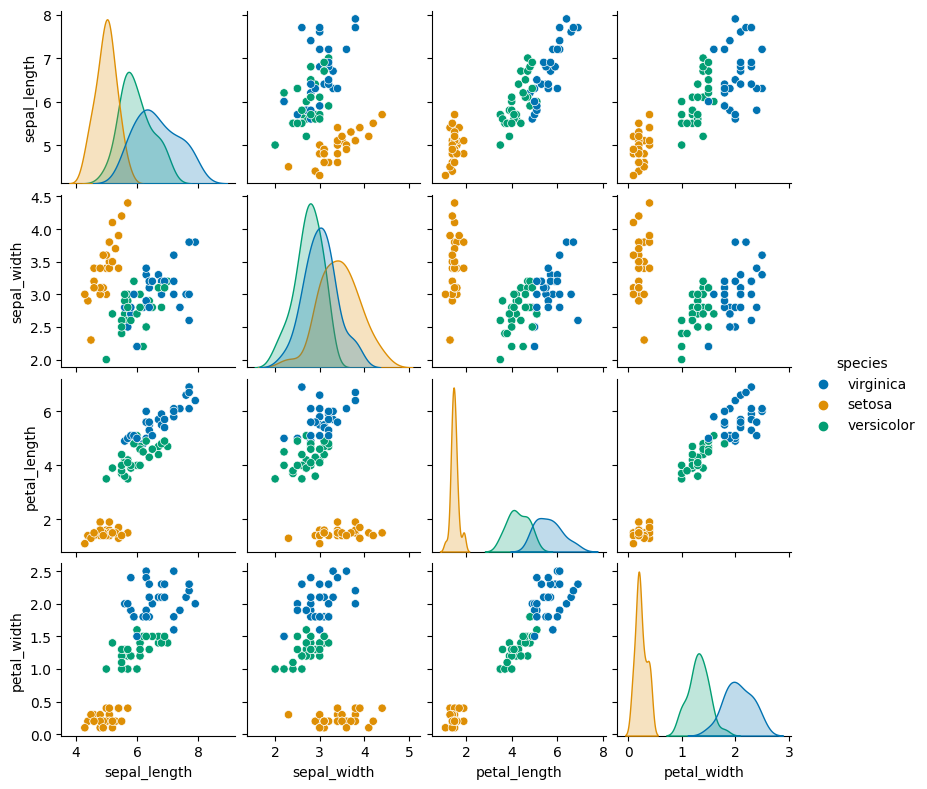

In [7]:
sns.pairplot(train,hue='species',height=2,palette='colorblind');

### Separacion de la etiqueta de clase y atributos

In [8]:
# separacion objetivo - explicativas de cada grupo
#grupo entrenamiento
x_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train['species']
#grupo prueba
x_test = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = train['species']
#Mostrar los primeros valores
print(x_train.head(5))
print(y_train.head(5))

     sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
6             4.6          3.4           1.4          0.3
94            5.6          2.7           4.2          1.3
96            5.7          2.9           4.2          1.3
26            5.0          3.4           1.6          0.4
130     virginica
6          setosa
94     versicolor
96     versicolor
26         setosa
Name: species, dtype: object



## Arbol de decision (Clasificacion)

In [9]:
# Creacion del modelo del arbol de decision
mod_dt = DecisionTreeClassifier(max_depth=3 , random_state=1)
mod_dt.fit(x_train,y_train)
predicion= mod_dt.predict(x_test)

In [10]:
# Modulos para metricas de eficiencia del modelo
from sklearn import metrics


In [11]:
print('La precision del arbol de decision es: {:.3f}'.format(metrics.accuracy_score(predicion,y_test)))

La precision del arbol de decision es: 0.978


In [12]:
mod_dt.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

[Text(0.375, 0.875, 'petal_width <= 0.7\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal_length <= 4.95\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal_width <= 1.65\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal_width <= 1.7\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = virginica')]

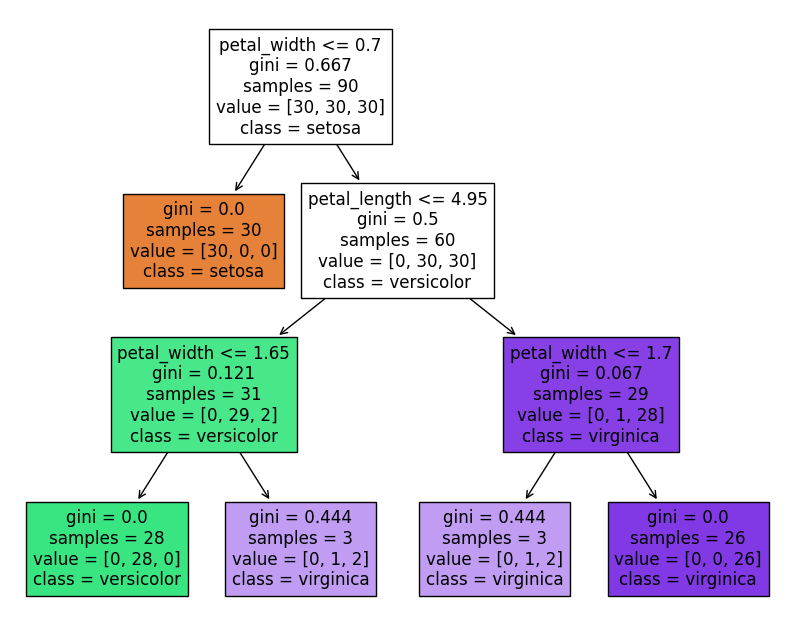

In [13]:
plt.figure(figsize=(10,8))
plot_tree(mod_dt,feature_names=mod_dt.feature_names_in_,class_names=['setosa','versicolor','virginica'],filled=True)

In [14]:
#Función para visualizar el límite de decisión y los datos de prueba
def boundary2D():
    plot_step = 0.01
    plot_color = 'ryb'
    xx, yy = np.meshgrid(np.arange(0,7,plot_step), np.arange(0,3,plot_step))
    plt.tight_layout(h_pad=1,w_pad=1, pad=2.5)
    
    # Generación del modelo
    predictores = ['petal_length','petal_width']
    mod_dt1 = DecisionTreeClassifier(max_depth=3,random_state=1)
    y_train_en = y_train.replace({'setosa':0, 'versicolor':1, 'virginica':2}).copy()
    mod_dt1.fit(x_train[predictores], y_train_en)
    
    #Realizar la predicción
    pred_all = mod_dt1.predict(np.c_[xx.ravel(), yy.ravel()])
    pred_all = pred_all.reshape(xx.shape)
    
    graph = plt.contourf(xx,yy,pred_all,cmap=plt.cm.RdYlBu)
    
    plt.xlabel(predictores[0])
    plt.ylabel(predictores[1])
    
    #trazar los datos de prueba
    
    n_class =3
    cn = ['setosa','versicolor','virginica']
    for i, color in zip(cn, plot_color):
        temp = np.where(y_test == i)
        inx = [elem  for elems in temp for elem in elems]
        plt.scatter(x_test.iloc[inx,2],x_test.iloc[inx,3], c=color,label=y_test,cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
        
    plt.suptitle('limite de decisión  con datos de prueba - visualización 2d')        
    plt.axis('tight');

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\danie\AppData\Local\Temp\ipykernel_19540\4129861146.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test.iloc[inx,2],x_test.iloc[inx,3], c=color,label=y_test,cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
C:\Users\danie\AppData\Local\Temp\ipykernel_19540\4129861146.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test.iloc[inx,2],x_test.iloc[inx,3], c=color,label=y_test,cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
C:\Users\danie\AppData\Local\Temp\ipykernel_19540\4129861146.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_test.iloc[inx,2],x_test.iloc[inx,3], c=color,label=y_t

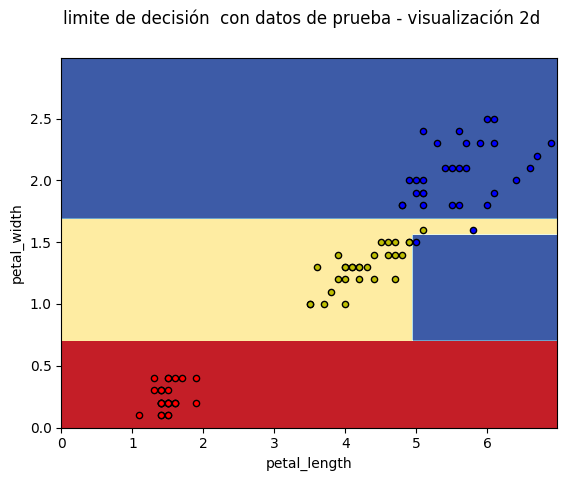

In [16]:
boundary2D()